# [定义目标](http://localhost:8888/notebooks/Data/My_Road/%E5%AE%9A%E4%B9%89%E7%9B%AE%E6%A0%87.ipynb)

* [Titanic_RandomForest:0.83253](https://www.kaggle.com/csw4192/titanic-randomforest)

# [数据获取](http://localhost:8888/notebooks/Data/My_Road/%E6%95%B0%E6%8D%AE%E8%8E%B7%E5%8F%96.ipynb)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("data/"))

import warnings
warnings.filterwarnings('ignore')

['gender_submission.csv', 'test.csv', 'train.csv']


* 这里是将所有训练集和测试集都输入进来做分析

In [2]:
# Read datasets from csv
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# Merge the 2 dataframes for EDA and feature engineeraing
full = pd.concat([df_train, df_test], axis = 0)

# Set PassengerId as Index
full.set_index('PassengerId', drop = False, inplace=True)
train = full[:891]

# Display Data
display(full.head(3))
print(f"Dataset contains {full.shape[0]} records, with {full.shape[1]} variables.")
print(f"Variables:{list(full.columns)}")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


Dataset contains 1309 records, with 12 variables.
Variables:['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket']


# [数据理解](http://localhost:8888/notebooks/Data/Python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E4%B8%8E%E6%8C%96%E6%8E%98%E5%AE%9E%E6%88%98/%E6%95%B0%E6%8D%AE%E6%8E%A2%E7%B4%A2.ipynb)

* 缺失值查看

In [3]:
# Identify Missing Values
display(full.isnull().sum())

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

* 查看分布

In [4]:
# Descriptive Statistics
full.describe(include="all")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


* 查看特定图例分布

survived: 38.38%


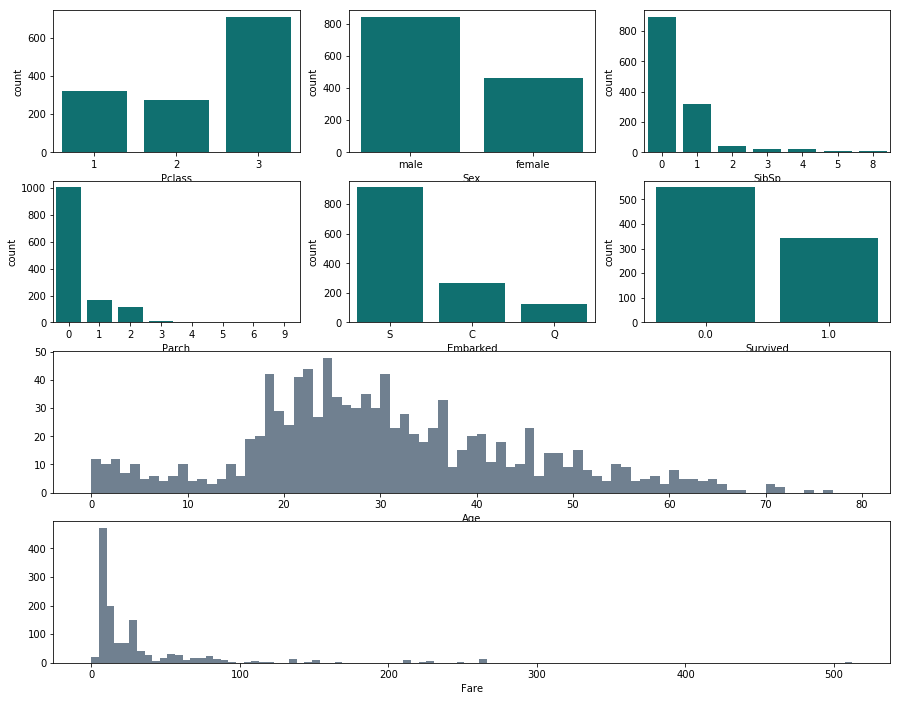

In [5]:
# EDA - Distributions
categorical_var = ['Pclass','Sex','SibSp','Parch','Embarked', 'Survived']
continuous_var = ['Age','Fare']

# Plot Categorical Var
fig, axs = plt.subplots(4,3, figsize = (15,12))
for i,key in enumerate(categorical_var):
     sns.countplot(data = full, x = key, ax = axs[i//3,i%3], color='teal')

# Plot Age
plt.subplot2grid((4,3),(2,0),rowspan=1,colspan=3);
plt.hist(full.Age[full.Age.isna()!=True], bins=range(0,80,1), color='slategrey' );
plt.xlabel('Age');

# Plot Fare
plt.subplot2grid((4,3),(3,0),rowspan=1,colspan=3);
plt.hist(full.Fare[full.Fare.isna()!=True], bins=100, color='slategrey');
plt.xlabel('Fare');

print(f"survived: {full.Survived.mean()*100:.2f}%")

* EDA可视化:两两特征之间

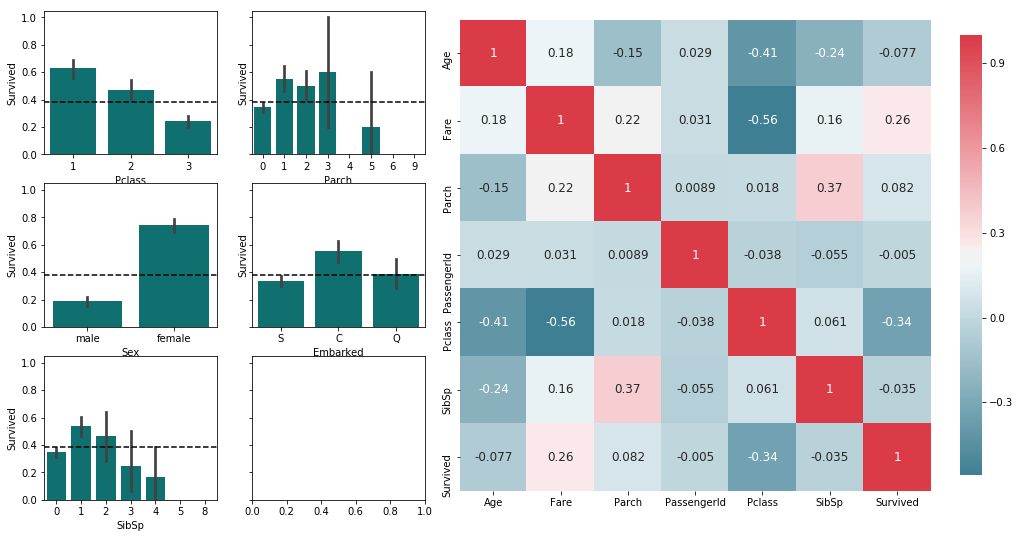

In [6]:
# Plot all categorical features with Survival rate
f, axs = plt.subplots(3,5, sharey=True, figsize=(18,9))
for i,key in enumerate(categorical_var[:-1]): # except feature Survived
    sns.barplot(data = full, x= key, y='Survived', ax = axs[i%3, i//3], color='teal');
    axs[i%3, i//3].axhline(y=0.3838, color='k', linestyle='--')

# Plot Correlation
corr = full.corr()
plt.subplot2grid((3,5),(0,2),rowspan=3,colspan=3);
cmap =sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, annot = True, annot_kws = { 'fontsize' : 12 });

<font color=red>性别跟生存与否关联很大.
舱位等级和票价也有强对应关系,估计是距离甲板近,因此距离救生船更方便.
年龄和生存没有体现出相关性</font>

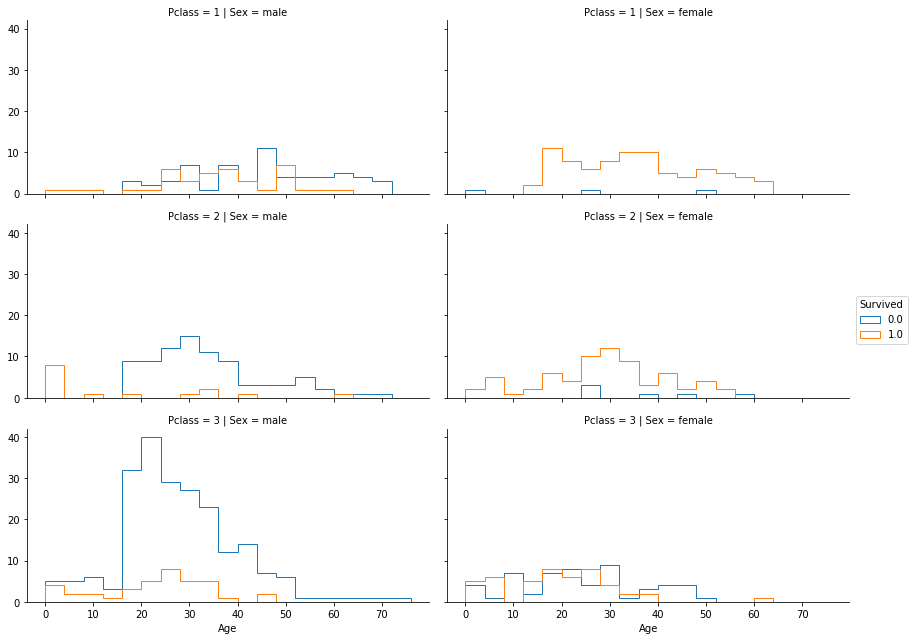

In [7]:
# Plot number of survived passengers by PClass, Sex and Age
facet = sns.FacetGrid(full, row = 'Pclass',col='Sex', hue = 'Survived', aspect=2)
facet.map(plt.hist, 'Age', histtype='step', bins = np.arange(0,80,4))

facet.add_legend();

<font color=red>清楚地显示出“女性第一”模式。
儿童生存优势似乎申请< 12岁。
更高的存活率在1和2类。妇女和儿童在这些2类有一个更高的存活率(有些甚至年龄范围为100%),相比第三类(约有50%的几率)清楚地表明,“女性第一”的模式。
儿童生存优势似乎申请< 12岁。
更高的存活率在1和2类。妇女和儿童在这些2类有一个更高的存活率(有些甚至年龄范围为100%),相比第三类(约有50%的机会)<font>

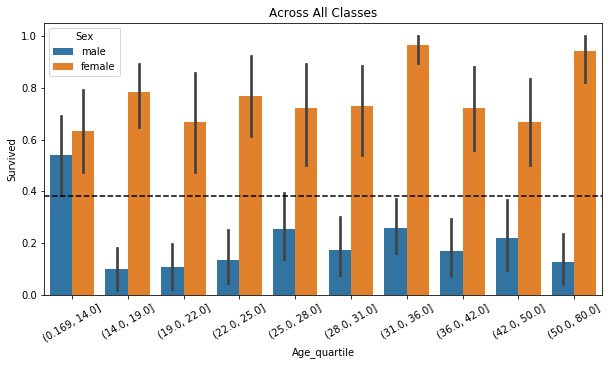

In [8]:
# Create Age Quartiles
full['Age_quartile'] = pd.qcut(full.Age,10)

# Plot age quartiles by sex with survival rate
plt.figure(figsize = (10,5))
sns.barplot(data = full, x= 'Age_quartile', y='Survived', hue = 'Sex');
plt.axhline(y=0.3838, color='k', linestyle='--')
plt.xticks(rotation = 30);
plt.title('Across All Classes');

In [9]:
full['Child'] = (full['Age'] <= 14).astype(int)

<font color=red>可以看出男孩的年龄界限应该在14岁以下作为依据<font>

# [特征工程](http://localhost:8888/notebooks/Data/Python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E4%B8%8E%E6%8C%96%E6%8E%98%E5%AE%9E%E6%88%98/%E6%95%B0%E6%8D%AE%E9%A2%84%E5%A4%84%E7%90%86.ipynb)

In [10]:
import re 

# function to parse surname of the passengers
def parse_surname(s):
    m = re.search('(\w+),.*',s)
    return m.group(1)

* 将姓名和家人数量呼应了

In [11]:
family = pd.DataFrame()

# Parse Surname from Name
family['Surname'] = full.Name.map(parse_surname)

# Assign codes to surname for later grouping
surname_count_dict = {}
surname_code_dict = {}
for i, name in enumerate(family['Surname'].unique()):
    surname_count_dict[name] = sum(family['Surname']==name)
    surname_code_dict[name] = i
    
family['SurnameCode'] = family['Surname'].map(surname_code_dict)
family['SurnameSize'] = family['Surname'].map(surname_count_dict)
family['FamilySize'] = 1 + full.Parch + full.SibSp # True Family Size 

# Examples with common surname
display(full[family.Surname == 'Abbott'])

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Age_quartile,Child
PassengerId,,,,,,,,,,,,,,
280,35.0,NaN,S,20.25,"Abbott, Mrs. Stanton (Rosa Hunt)",1,280,3,female,1,1.0,C.A. 2673,"(31.0, 36.0]",0
747,16.0,NaN,S,20.25,"Abbott, Mr. Rossmore Edward",1,747,3,male,1,0.0,C.A. 2673,"(14.0, 19.0]",0
1284,13.0,NaN,S,20.25,"Abbott, Master. Eugene Joseph",2,1284,3,male,0,NaN,C.A. 2673,"(0.169, 14.0]",1


In [12]:
family.tail()

,Surname,SurnameCode,SurnameSize,FamilySize
PassengerId,,,,
1305,Spector,869,1,1
1306,Ocana,870,1,1
1307,Saether,871,1,1
1308,Ware,816,4,1
1309,Peter,117,3,3


In [13]:
def tick2fam_gen(df):
    """
    Function to judge if passengers are likely to be in the same family.
    Input: DataFrame with Passenger surname and ticket
    Return: Code generated to specify different families
    """
    # initialize ticket dict
    dict_tick2fam = {'000000': 0}
    fam_counter = 0
        
    for i in df.index:    
        keys = list(dict_tick2fam.keys())
        print(dict_tick2fam)
        chk_key = df.loc[i, 'Ticket']
        print(keys)
        for key in keys:
            if len(chk_key) == len(key): #if their tickets have high similarity
                print('1')
                if (chk_key[-4].isdigit()) & (key[-4].isdigit()):  # Python isdigit() 方法检测字符串是否只由数字组成。
                    print('2')
                    if (chk_key[:-2] == key[:-2]) & (np.abs(int(chk_key[-2:]) - int(key[-2:])) <= 10):
                        dict_tick2fam[chk_key] = dict_tick2fam[key]
                        print('dict_tick2fam[key]')
                        print('oo:',dict_tick2fam)
                        break
                    
            if key == keys[-1]:
                fam_counter += 1
                dict_tick2fam[chk_key] = str(fam_counter)  
                
    return dict_tick2fam

In [14]:
family_infer[family.Surname == 'Smith']

NameError: name 'family_infer' is not defined

In [ ]:
# DF to provide a view for checking if function works properly
family_infer = pd.concat([family, full[['Parch','SibSp','Age','Name','Pclass','Ticket','Embarked','Survived']]], axis = 1)

# Single out Surnames with size > true family size (may have more than 1 family involved)
chk_surname = family_infer[family['FamilySize'] < family['SurnameSize']].Surname.unique() # surnames to check
# chk_surname2 = family_infer[family['FamilySize'] > family['SurnameSize']].Surname.unique() # unidentified fam

# Regrouping Families according to Family Size and Ticket.
family['SurnameAdj'] = family['Surname'] #new column for corrected family_group

for s in chk_surname:
    family_regroup = family_infer[family.Surname == s] #get family with specific surname
    fam_code_dict = tick2fam_gen(family_regroup) #pass in df to get family codes within the same surname

    for idx in family_regroup.index: #assign family code 1by1
        curr_ticket = full.loc[idx].Ticket

        if family_regroup.loc[idx].FamilySize == 1: #for passengers traveling alone
            if family_regroup.Ticket.value_counts()[curr_ticket] > 1: #relatives that shares surname and ticket, which Parch and SibSp failed to record
                family.loc[idx, 'SurnameAdj'] =  family.loc[idx].Surname + '-hidfam' + fam_code_dict[curr_ticket]
            else: #single traveler
                family.loc[idx, 'SurnameAdj'] =  family.loc[idx].Surname + '-single' + fam_code_dict[curr_ticket]
        else: #families
            family.loc[idx, 'SurnameAdj'] =  family.loc[idx].Surname + '-fam' + fam_code_dict[curr_ticket]

display(family[family.Surname == 'Smith'])

In [ ]:
# Assign codes to families
Family_count_dict = {}
Family_code_dict = {}
for i, name in enumerate(family['SurnameAdj'].unique()):
    surname_count_dict[name] = sum(family['SurnameAdj']==name) # count no. of member of the same fam
    surname_code_dict[name] = i # fam code

family['FamilyCode'] = family['SurnameAdj'].map(surname_code_dict)
family['FamilySize'] = family['SurnameAdj'].map(surname_count_dict)

print(f"No. of Family Before Regrouping: {len(family.SurnameCode.unique())}")
print(f"No. of Family After Regrouping: {len(family.FamilyCode.unique())}")

In [ ]:
# Identify Groups (Those holding the same ticket code, could be friends/family)
group = pd.DataFrame(family[['FamilyCode','FamilySize']])

ticket_count = {}
ticket_code = {}
for i,ticket in enumerate(full.Ticket.unique()):
    ticket_count[ticket] = sum(full.Ticket == ticket)
    ticket_code[ticket] = i

group['Ticket_code'] = full.Ticket.map(ticket_code)
group['Ticket_size'] = full.Ticket.map(ticket_count)

print(f"No. of Tickets Identified: {len(group['Ticket_code'].unique())}")
display(full[(full.Ticket == 'A/4 48871') |(full.Ticket == 'A/4 48873')])

In [ ]:
def ChainCombineGroups(df, colA, colB):
    '''
    This function takes in 2 columns of labels and chain all items which share
    the same labels within each of the 2 columns
    input:
    df - DataFrame
    colA - Key for Col
    colB - Key for Col  
    output:
    array of numeric grouping labels
    '''
    # make a copy of DFs for iteration
    data = df.copy()
    search_df = data.copy()
    
    group_count = 0

    while not search_df.empty:

        # Initiate pool and Select Reference item
        pool = search_df.iloc[:1]
        idx = pool.index

        # Remove 1st item from searching df
        search_df.drop(index = idx, inplace = True)

        # Initialize Search
        flag_init = 1
        update = pd.DataFrame()

        # While loop to exhausively search for commonalities, pool is updated until no more common features are found
        while (flag_init or not update.empty):

            flag_init = 0

            # target labels to look for
            pool_A_uniq = np.unique(pool[colA])
            pool_B_uniq = np.unique(pool[colB])

            for col in [colA,colB]:
                idx = []

                # get all indexs of items with the same label
                for num in np.unique(pool[col]):
                    idx.extend(search_df[search_df[col] == num].index)

                # update pool
                update = search_df.loc[idx]
                pool = pd.concat([pool, update], axis = 0)

                # remove item from searching df
                search_df = search_df.drop(index = idx)

            # assign group num
            data.loc[pool.index, 'Group_'] = group_count

        group_count += 1
        
    return np.array(data['Group_'].astype(int))

In [ ]:
# Assign Final group no.
group['Group_code'] = ChainCombineGroups(group, 'FamilyCode', 'Ticket_code')
         
print(f"Family: {len(family.FamilyCode.unique())}")
print(f"Group: {len(group.Ticket_code.unique())}")
print(f"Combined: {len(group.Group_code.unique())}")
group.head()

In [ ]:
print('An example of grouping the both friends and family under a same group.')
display(pd.concat([full['Ticket'],family[['Surname','FamilyCode']],group[['Ticket_code','Group_code']]], axis = 1)[group['Group_code'] == 458])

In [ ]:
# Getting the Group Size
group_count={}
group_code = group['Group_code'].unique()
for code in group_code:
    group_count[code] = sum(group.Group_code == code)
group['Group_size'] = group.Group_code.map(group_count)

In [ ]:
# Prepare the df by adding the Survived features
group_corr_test = pd.concat([group, full.Survived, family[['SurnameCode','SurnameSize']]], axis = 1)

In [ ]:
group_corr_test.head()

In [ ]:
for param in [('SurnameCode','SurnameSize'),
              ('FamilyCode','FamilySize'),
              ('Ticket_code','Ticket_size'),
              ('Group_code','Group_size')]: # keep group at last
    
    # No. of member survived in each group
    n_member_survived_by_gp = group_corr_test.groupby(param[0]).Survived.sum()
    
    # No. of member survived in a particular group, discounting the passenger concerned
    n_mem_survived = group_corr_test[param[0]].map(n_member_survived_by_gp)
    n_mem_survived_adj = n_mem_survived - group_corr_test.Survived.apply(lambda x: 1 if x == 1 else 0)

    # Same for the dead
    n_member_dead_by_gp = group_corr_test.groupby(param[0]).Survived.count() - group_corr_test.groupby(param[0]).Survived.sum()
    n_mem_dead  = group_corr_test[param[0]].map(n_member_dead_by_gp)
    n_mem_dead_adj = n_mem_dead - group_corr_test.Survived.apply(lambda x: 1 if x == 0 else 0)

    # How many people from that group that we do not have data on.
    unknown_factor = (group_corr_test[param[1]] - n_mem_survived_adj - n_mem_dead_adj)/group_corr_test[param[1]]
    confidence = 1 - unknown_factor

    # Ratio of members survived in that group, ranging from -1 to 1, adjusted by the confidence weight
    key = 'Confidence_member_survived'+'_'+param[0]
    ratio = (1/group_corr_test[param[1]]) * (n_mem_survived_adj - n_mem_dead_adj)
    group_corr_test[key] = confidence * ratio
    
    group['Ratio_member_survived'] = (1/group_corr_test[param[1]]) * (n_mem_survived_adj - n_mem_dead_adj)
    group['Confidence_member_survived'] = confidence * ratio

# Display Correlation
plt.barh(group_corr_test.corr().Survived[-4:].index, group_corr_test.corr().Survived[-4:])
plt.xlabel('Correlation with Survived');

* 解析船票信息

In [ ]:
def parse_ticket(str1):
    m = re.search(r'(.*)(\s\d|\s\d{4,7}$)',str1)
    s = re.search(r'[A-Z]+',str1)
    if m:
        str2 = m.group(1)
        n =re.search(r'([A-Z]+)[^A-Z0-9]*([A-Z]+)*[^A-Z0-9]*([A-Z0-9]*)[^A-Z]*([A-Z]*)*',str2)
        new_str = ''
        if n:    
            if n.group(1):
                new_str+=n.group(1)
                if n.group(2) or n.group(3):
                    if n.group(2):
                        new_str+=n.group(2)
                    if n.group(3):
                        new_str+=n.group(3)
                        if n.group(4):
                            new_str+=n.group(4)
                            if n.group(5):
                                new_str+=m.group(5)
    elif s:
        new_str = s.group(0)
    else:
        new_str = 'XXX'
    return new_str

In [ ]:
ticket = pd.DataFrame(full.Survived)

ticket['Ticket'] = full.Ticket.map(parse_ticket)
d = dict(zip(ticket.Ticket.value_counts().index, ticket.Ticket.value_counts()))
ticket['Ticket_count'] = ticket['Ticket'].map(d)
plt.figure(figsize = (12,6))
sns.barplot(data = ticket[ticket['Ticket_count'] > 10], x = 'Ticket', y = 'Survived')
plt.axhline(y=0.3838, color='k', linestyle='--');

In [ ]:
ticket['A5'] = (ticket['Ticket'] == 'A5').astype(int)
ticket['PC'] = (ticket['Ticket'] == 'PC').astype(int)

* 解析票价

In [ ]:
# Fare Adjustment
full['Fare_adj'] = full.Fare/group.Ticket_size

# Plot Fare Adjustment
fig, axs = plt.subplots(2,figsize = (14,10))
axs[0].hist(full.Fare[full.Fare.isna()!=True], bins=80);
axs[0].set_title('Before Adjustment')
axs[0].set_xlabel('Fare')
axs[1].hist(full.Fare_adj[full.Fare_adj.isna()!=True], bins=80);
axs[1].set_title('After Adjustment');
axs[1].set_xlabel('Fare_adj');

In [ ]:
# Handle missing Fare
full[full.Fare.isnull()] #PassengerId 1044 has fare value missing
fare_dict_nan = dict(full.groupby('Pclass').Fare_adj.mean())
full.loc[full.Fare.isnull(),['Fare','Fare_adj']]= fare_dict_nan[3] # fill value according to PClass

* 称谓预测年龄处理

In [ ]:
# Parse Titles from Names
title = pd.DataFrame()

def parse_name(str):
    m = re.search(', (\w+ *\w*)\.',str)
    return m.group(1)
    
title['Title'] = full.Name.map(parse_name)
title.Title.unique()

In [ ]:
# Simplify title groups
Title_Dictionary = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }

title.Title = title.Title.map(Title_Dictionary)

In [ ]:
# Plot the distribution of Age by Title
title = title.join(full.Age)
# display(title.groupby('Title').describe());
plt.figure(figsize = (14,6))
sns.violinplot(data = title, x = 'Title', y = 'Age');

In [ ]:
title_age_dict = {}

# Calculate mean age of each title group
for t in title.Title.unique():
    title_age_dict[t] = title[title.Title == t].Age.mean() 

# Fill in Age according to passenger's title
idx = full.Age.isnull()
full['Age_infer'] = full['Age']
full.loc[idx, 'Age_infer'] = title.loc[idx].Title.map(title_age_dict)
full['Child'] = (full['Age_infer'] <= 14).astype(int)

* 归一化:最大最小值标准化

In [ ]:
from sklearn.preprocessing import MinMaxScaler # 归一化:最大最小值标准化

# Select features as predictors
features = pd.concat([full[['Pclass','Sex','Child','Fare_adj','Parch','SibSp']],
                      group[['Group_size','Confidence_member_survived']],
                      title['Title'],
                      ticket[['A5','PC']]], axis = 1)

# MinMax Transform the continuous variables
scalar = MinMaxScaler()

continuous = ['Fare_adj','Group_size']
features_minmax_transformed = pd.DataFrame(data = features)
features_minmax_transformed[continuous] = scalar.fit_transform(features_minmax_transformed[continuous])

# Transform Sex labels into binary code
features_minmax_transformed.Sex = features_minmax_transformed.Sex.apply(lambda x: 1 if x == 'male' else 0)

# One-hot Encoding
features_final = pd.get_dummies(features_minmax_transformed)

encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Seperate Train Data and Test Data
features_final_train = features_final[:891]
features_final_test = features_final[891:]

* 数据分割

In [ ]:
# Spliting Training Sets into Train and Cross-validation sets
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(features_final_train, 
                                                    train.Survived, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# [数据保存](http://localhost:8888/notebooks/Data/My_Road/%E6%95%B0%E6%8D%AE%E4%BF%9D%E5%AD%98.ipynb)

# [模型选择](http://localhost:8888/notebooks/Data/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%B1%BB%E5%88%AB/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%B1%BB%E5%88%AB.ipynb)

* 选择评分函数

In [ ]:
# Create Model Training Pipeline
from sklearn.metrics import accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    
    # Get the predictions on the test set(X_test),
    predictions_test = learner.predict(X_test)
    
    # then get predictions on the training samples(X_train)
    predictions_train = learner.predict(X_train)
            
    # Compute accuracy on the training samples
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
       
    # Success
    print("{} trained on {} samples. Acc: {:.4f}".format(learner.__class__.__name__, sample_size, results['acc_test']))
        
    # Return the results
    return results

* 多模型预测

In [ ]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier

# Initialize the three models
clf_A = GradientBoostingClassifier(random_state = 0)
clf_B = LogisticRegression(random_state= 0)
clf_C = RandomForestClassifier(random_state= 0)

# Calculate the number of samples for 10%, 50%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)/2)
samples_1 = int(len(y_train)/10)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# [性能评估](http://localhost:8888/notebooks/Data/My_Road/%E6%80%A7%E8%83%BD%E8%AF%84%E4%BC%B0.ipynb)

In [ ]:
# Reshaping the Results for plotting
df = pd.DataFrame()

for i in results.items():
    temp = pd.DataFrame(i[1]).rename(columns={0:'1% of train', 1:'10% of train', 2:'100% of train'})
    temp['model'] = i[0]
    df = pd.concat([df, temp], axis = 0)
df_plot = df.reset_index().melt(id_vars=['index','model'])

# Ploting the results
fig, axs = plt.subplots(1,2,figsize = (14,4))
for i,key in enumerate(df_plot['index'].unique()[:2]):
    ax = axs[i%2]
    sns.barplot(data = df_plot[df_plot['index'] == key], x = 'model', y = 'value',
                hue = 'variable', ax = ax)
    ax.set_ylim([0,1])
    ax.set_title(key)
    ax.legend(ncol=3, loc="lower right", frameon=True, fontsize = 'small')

# [模型优化](http://localhost:8888/notebooks/Data/My_Road/%E6%A8%A1%E5%9E%8B%E4%BC%98%E5%8C%96.ipynb)

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(random_state = 0, oob_score = True)

parameters = {'criterion' :['gini'],
             'n_estimators' : [400], #[100,200,400]
             'max_depth':[6], #[3,4,5,6]
             'min_samples_leaf': [5], # [2,4,6]
              'max_leaf_nodes': [10], # [8,10,12]
              'min_impurity_decrease': [0], # [0,0.001,0.005]
              'max_features' : [1] # [1,2,3]
             }

scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv = 10)

grid_fit = grid_obj.fit(X_train,y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Oob score on testing data: {:.4f}".format(clf.oob_score_))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final oob score on the testing data: {:.4f}".format(best_clf.oob_score_))
print("\nBest Parameters\n------")
best_clf

In [ ]:
# Plot Feature Importnace
idx = np.argsort(best_clf.feature_importances_)
plt.figure(figsize = (12,8))
plt.barh(range(len(best_clf.feature_importances_)),best_clf.feature_importances_[idx])
plt.yticks(range(len(best_clf.feature_importances_)),features_final_train.columns[idx]);
plt.title('Feature Importance');

# [模型使用](http://localhost:8888/notebooks/Data/My_Road/%E6%A8%A1%E5%9E%8B%E4%BD%BF%E7%94%A8.ipynb)

In [ ]:
# Output for Kaggle competition
final_predict = best_clf.predict(features_final_test)

prediction = pd.DataFrame(full[891:].PassengerId)
prediction['Survived'] = final_predict.astype('int')

prediction.to_csv('predict.csv',index = False)